### Project: Smart Device Usage Analysis for Bellabeat

Bellabeat aims to become a larger player in the smart wellness technology market. As a junior data analyst on the marketing team, my task is to analyze smart device usage trends using public Fitbit data. By identifying common habits and preferences in how users engage with health-tracking devices, I will provide actionable marketing insights. These insights will be applied to one Bellabeat product to help refine and optimize Bellabeat’s overall marketing strategy.

This analysis uses the publicly available Fitbit Fitness Tracker Dataset hosted on Kaggle. It contains minute and daily-level data from 30 Fitbit users, including activity, heart rate, sleep, and step counts. While the dataset is well-structured and offers detailed behavioral data, it is limited by sample size and timeframe (2016). The data is in both wide and long formats depending on the file and is shared under a CC0 Public Domain license, making it suitable for public analysis and portfolio use.

In [1]:
import pandas as pd
import os

# Load the key uploaded CSV files
activity_df = pd.read_csv("dailyActivity_merged.csv")
sleep_df = pd.read_csv("minuteSleep_merged.csv")
heart_df = pd.read_csv("heartrate_seconds_merged.csv")
weight_df = pd.read_csv("weightLogInfo_merged.csv")
steps_df = pd.read_csv("minuteStepsNarrow_merged.csv")
mets_df = pd.read_csv("minuteMETsNarrow_merged.csv")

In [3]:
# Load the remaining CSVs
hourly_cal_df = pd.read_csv("hourlyCalories_merged.csv")
hourly_int_df = pd.read_csv("hourlyIntensities_merged.csv")
hourly_steps_df = pd.read_csv("hourlySteps_merged.csv")
minute_cal_df = pd.read_csv("minuteCaloriesNarrow_merged.csv")
minute_int_df = pd.read_csv("minuteIntensitiesNarrow_merged.csv")

In [4]:
# Basic overview and cleaning: remove duplicates
activity_df.drop_duplicates(inplace=True)
sleep_df.drop_duplicates(inplace=True)
heart_df.drop_duplicates(inplace=True)
weight_df.drop_duplicates(inplace=True)
steps_df.drop_duplicates(inplace=True)
mets_df.drop_duplicates(inplace=True)

In [5]:
# Remove duplicates
hourly_cal_df.drop_duplicates(inplace=True)
hourly_int_df.drop_duplicates(inplace=True)
hourly_steps_df.drop_duplicates(inplace=True)
minute_cal_df.drop_duplicates(inplace=True)
minute_int_df.drop_duplicates(inplace=True)

In [8]:
# Fix the datetime parsing for minuteSleep_merged.csv
sleep_df['date'] = pd.to_datetime(sleep_df['date'], format="%m/%d/%Y %I:%M:%S %p")

In [9]:
# Convert date/time columns
activity_df['ActivityDate'] = pd.to_datetime(activity_df['ActivityDate'], format="%m/%d/%Y")
sleep_df['date'] = pd.to_datetime(sleep_df['date'], format="%m/%d/%Y")
heart_df['Time'] = pd.to_datetime(heart_df['Time'], format="%m/%d/%Y %I:%M:%S %p")
steps_df['ActivityMinute'] = pd.to_datetime(steps_df['ActivityMinute'], format="%m/%d/%Y %I:%M:%S %p")
mets_df['ActivityMinute'] = pd.to_datetime(mets_df['ActivityMinute'], format="%m/%d/%Y %I:%M:%S %p")
weight_df['Date'] = pd.to_datetime(weight_df['Date'], format="%m/%d/%Y %I:%M:%S %p")

In [10]:
# Now re-check missing values and shape summaries
missing_data_summary = {
    "dailyActivity": activity_df.isnull().sum(),
    "minuteSleep": sleep_df.isnull().sum(),
    "heartrate_seconds": heart_df.isnull().sum(),
    "weightLog": weight_df.isnull().sum(),
    "minuteSteps": steps_df.isnull().sum(),
    "minuteMETs": mets_df.isnull().sum()
}

In [11]:
shapes_summary = {
    "dailyActivity": activity_df.shape,
    "minuteSleep": sleep_df.shape,
    "heartrate_seconds": heart_df.shape,
    "weightLog": weight_df.shape,
    "minuteSteps": steps_df.shape,
    "minuteMETs": mets_df.shape
}

In [12]:
missing_data_summary, shapes_summary

({'dailyActivity': Id                          0
  ActivityDate                0
  TotalSteps                  0
  TotalDistance               0
  TrackerDistance             0
  LoggedActivitiesDistance    0
  VeryActiveDistance          0
  ModeratelyActiveDistance    0
  LightActiveDistance         0
  SedentaryActiveDistance     0
  VeryActiveMinutes           0
  FairlyActiveMinutes         0
  LightlyActiveMinutes        0
  SedentaryMinutes            0
  Calories                    0
  dtype: int64,
  'minuteSleep': Id       0
  date     0
  value    0
  logId    0
  dtype: int64,
  'heartrate_seconds': Id       0
  Time     0
  Value    0
  dtype: int64,
  'weightLog': Id                 0
  Date               0
  WeightKg           0
  WeightPounds       0
  Fat               31
  BMI                0
  IsManualReport     0
  LogId              0
  dtype: int64,
  'minuteSteps': Id                0
  ActivityMinute    0
  Steps             0
  dtype: int64,
  'minuteMETs': Id

In [13]:
# Convert datetime columns
hourly_cal_df['ActivityHour'] = pd.to_datetime(hourly_cal_df['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")
hourly_int_df['ActivityHour'] = pd.to_datetime(hourly_int_df['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")
hourly_steps_df['ActivityHour'] = pd.to_datetime(hourly_steps_df['ActivityHour'], format="%m/%d/%Y %I:%M:%S %p")
minute_cal_df['ActivityMinute'] = pd.to_datetime(minute_cal_df['ActivityMinute'], format="%m/%d/%Y %I:%M:%S %p")
minute_int_df['ActivityMinute'] = pd.to_datetime(minute_int_df['ActivityMinute'], format="%m/%d/%Y %I:%M:%S %p")

In [14]:
# Check for missing values
more_missing_data_summary = {
    "hourlyCalories": hourly_cal_df.isnull().sum(),
    "hourlyIntensities": hourly_int_df.isnull().sum(),
    "hourlySteps": hourly_steps_df.isnull().sum(),
    "minuteCalories": minute_cal_df.isnull().sum(),
    "minuteIntensities": minute_int_df.isnull().sum()
}

In [15]:
# Get shapes
more_shapes_summary = {
    "hourlyCalories": hourly_cal_df.shape,
    "hourlyIntensities": hourly_int_df.shape,
    "hourlySteps": hourly_steps_df.shape,
    "minuteCalories": minute_cal_df.shape,
    "minuteIntensities": minute_int_df.shape
}

In [16]:
more_missing_data_summary, more_shapes_summary

({'hourlyCalories': Id              0
  ActivityHour    0
  Calories        0
  dtype: int64,
  'hourlyIntensities': Id                  0
  ActivityHour        0
  TotalIntensity      0
  AverageIntensity    0
  dtype: int64,
  'hourlySteps': Id              0
  ActivityHour    0
  StepTotal       0
  dtype: int64,
  'minuteCalories': Id                0
  ActivityMinute    0
  Calories          0
  dtype: int64,
  'minuteIntensities': Id                0
  ActivityMinute    0
  Intensity         0
  dtype: int64},
 {'hourlyCalories': (24084, 3),
  'hourlyIntensities': (24084, 4),
  'hourlySteps': (24084, 3),
  'minuteCalories': (1445040, 3),
  'minuteIntensities': (1445040, 3)})

I cleaned and transformed eleven core datasets from the Fitbit case study. Using Python, I removed duplicates, parsed all date and timestamp fields into standard formats, and confirmed that most datasets had no missing values. One exception was the weightLog dataset, where the Fat column had 31 missing entries. The data is now structured, validated, and ready for exploration in the Analyze phase.

In [17]:
# Calculate correlation between steps and calories
correlation_steps_calories = activity_df['TotalSteps'].corr(activity_df['Calories'])

In [18]:
# Summary statistics for activity and sedentary behavior
activity_summary = activity_df[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].describe()

In [19]:
# Check distribution of TotalSteps and Calories
steps_distribution = activity_df['TotalSteps'].describe()
calories_distribution = activity_df['Calories'].describe()

In [20]:
# Proportion of records with zero LoggedActivitiesDistance
zero_logged_activities_pct = (activity_df['LoggedActivitiesDistance'] == 0).mean() * 100

In [21]:
correlation_steps_calories, activity_summary, steps_distribution, calories_distribution, zero_logged_activities_pct

(0.5813801894994014,
        VeryActiveMinutes  FairlyActiveMinutes  LightlyActiveMinutes  \
 count         457.000000           457.000000            457.000000   
 mean           16.623632            13.070022            170.070022   
 std            28.919704            36.208635            122.205372   
 min             0.000000             0.000000              0.000000   
 25%             0.000000             0.000000             64.000000   
 50%             0.000000             1.000000            181.000000   
 75%            25.000000            16.000000            257.000000   
 max           202.000000           660.000000            720.000000   
 
        SedentaryMinutes  
 count        457.000000  
 mean         995.282276  
 std          337.021404  
 min           32.000000  
 25%          728.000000  
 50%         1057.000000  
 75%         1285.000000  
 max         1440.000000  ,
 count      457.000000
 mean      6546.562363
 std       5398.493064
 min          0.

I examined daily activity, step count, calorie burn, and sedentary behavior patterns from the cleaned Fitbit dataset. Users averaged 6,546 steps and burned around 2,189 calories per day, but also spent nearly 1,000 minutes being sedentary, with very limited time spent in high-intensity movement. A moderate positive correlation (r = 0.58) between step count and calories burned revealed that even low-to-moderate activity levels had a measurable impact on energy expenditure. Additionally, most users did not log workouts manually, reinforcing a preference for passive, automatic tracking. These findings suggest that Bellabeat should position its products as effortless, holistic wellness tools tailored for real lifestyles—not just for fitness enthusiasts. Marketing strategies can be more effective by focusing on features that support gentle movement, lifestyle balance, and stress recovery, rather than promoting performance-focused goals.

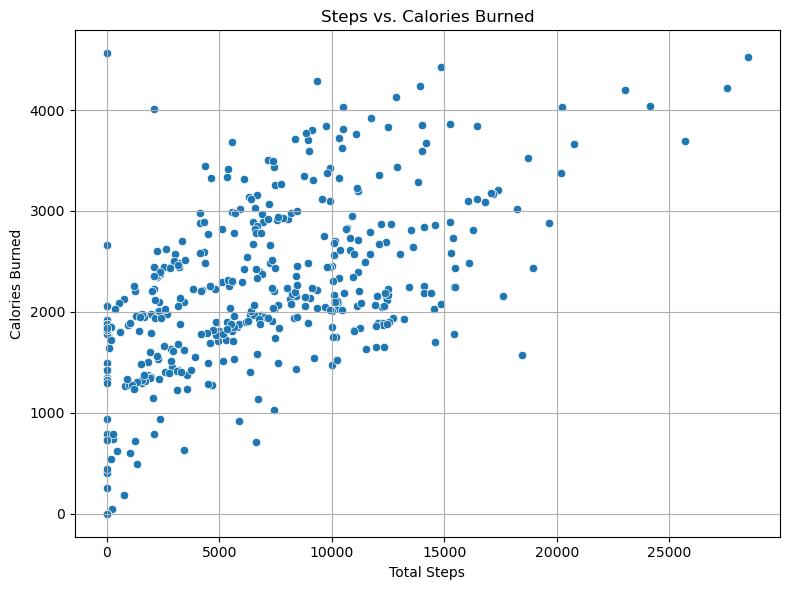

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv("dailyActivity_merged.csv")
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format="%m/%d/%Y")

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['TotalSteps'], y=df['Calories'])
plt.title("Steps vs. Calories Burned")
plt.xlabel("Total Steps")
plt.ylabel("Calories Burned")
plt.grid(True)
plt.tight_layout()
plt.show()

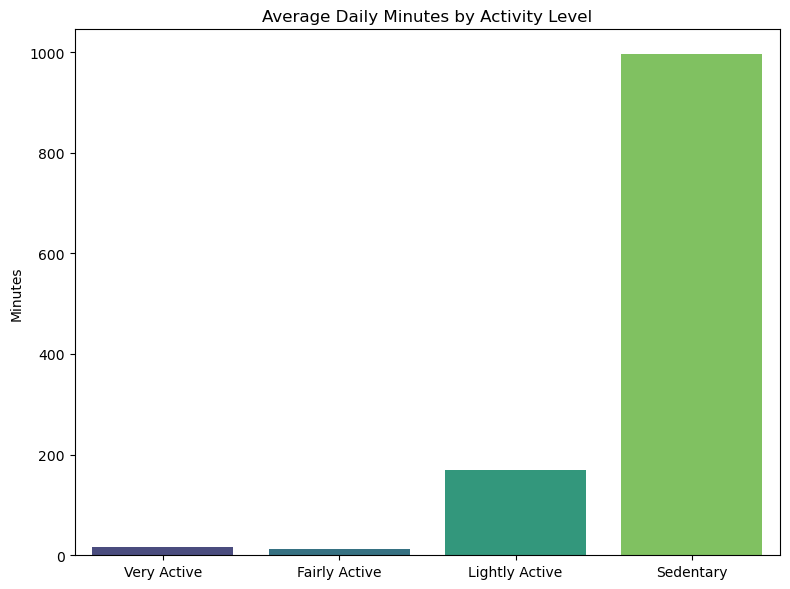

In [23]:
# Calculate average minutes per activity category
avg_minutes = {
    'Very Active': df['VeryActiveMinutes'].mean(),
    'Fairly Active': df['FairlyActiveMinutes'].mean(),
    'Lightly Active': df['LightlyActiveMinutes'].mean(),
    'Sedentary': df['SedentaryMinutes'].mean()
}

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(avg_minutes.keys()), y=list(avg_minutes.values()), palette='viridis')
plt.title("Average Daily Minutes by Activity Level")
plt.ylabel("Minutes")
plt.tight_layout()
plt.show()

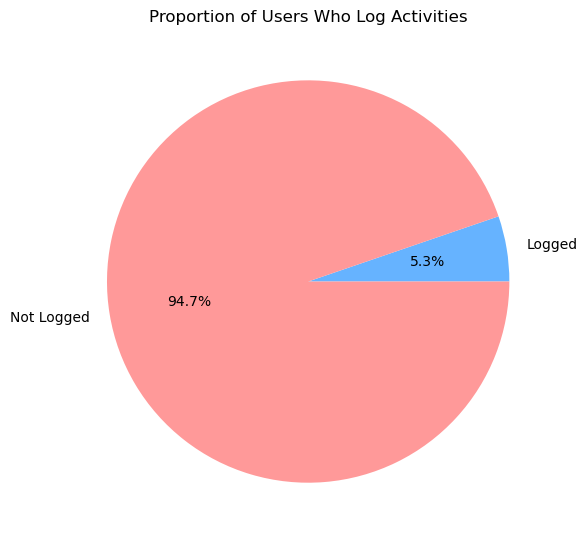

In [24]:
# Count how many users logged activities
logged = (df['LoggedActivitiesDistance'] > 0).sum()
not_logged = (df['LoggedActivitiesDistance'] == 0).sum()

# Plot
plt.figure(figsize=(6, 6))
plt.pie([logged, not_logged], labels=["Logged", "Not Logged"], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title("Proportion of Users Who Log Activities")
plt.tight_layout()
plt.show()

In [25]:
# Count number of active days per user
user_active_days = activity_df.groupby('Id')['ActivityDate'].nunique().reset_index()
user_active_days.columns = ['Id', 'ActiveDays']

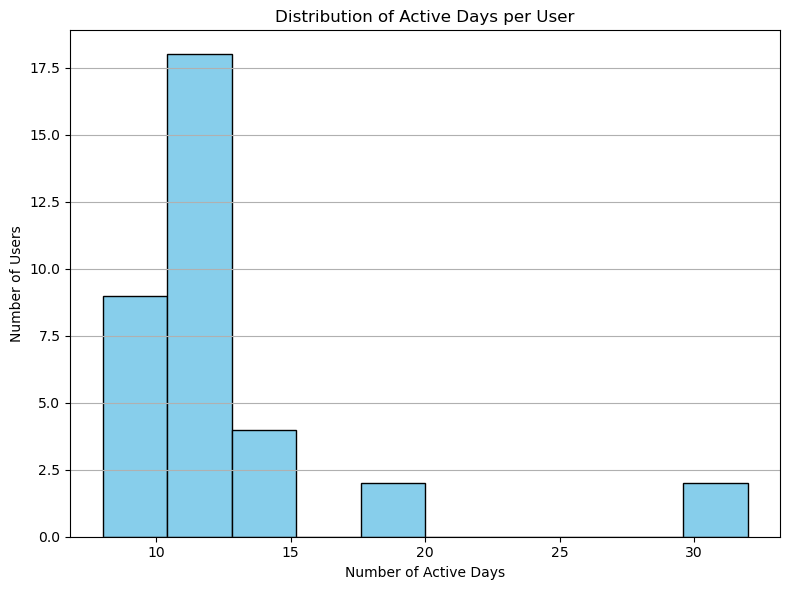

In [26]:
# Plot histogram of active days per user
plt.figure(figsize=(8, 6))
plt.hist(user_active_days['ActiveDays'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Active Days per User")
plt.xlabel("Number of Active Days")
plt.ylabel("Number of Users")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [27]:
# Flag users with low engagement (e.g., less than 10 active days)
low_usage_users = user_active_days[user_active_days['ActiveDays'] < 10]

user_active_days.head(), low_usage_users

(           Id  ActiveDays
 0  1503960366          19
 1  1624580081          19
 2  1644430081          10
 3  1844505072          12
 4  1927972279          12,
             Id  ActiveDays
 10  2891001357           8
 16  4388161847           8
 24  6391747486           9
 25  6775888955           9
 32  8583815059           8)

In [28]:
# Extract hour from the datetime
hourly_steps_df['Hour'] = hourly_steps_df['ActivityHour'].dt.hour

# Calculate average steps per hour across all users
avg_steps_by_hour = hourly_steps_df.groupby('Hour')['StepTotal'].mean().reset_index()

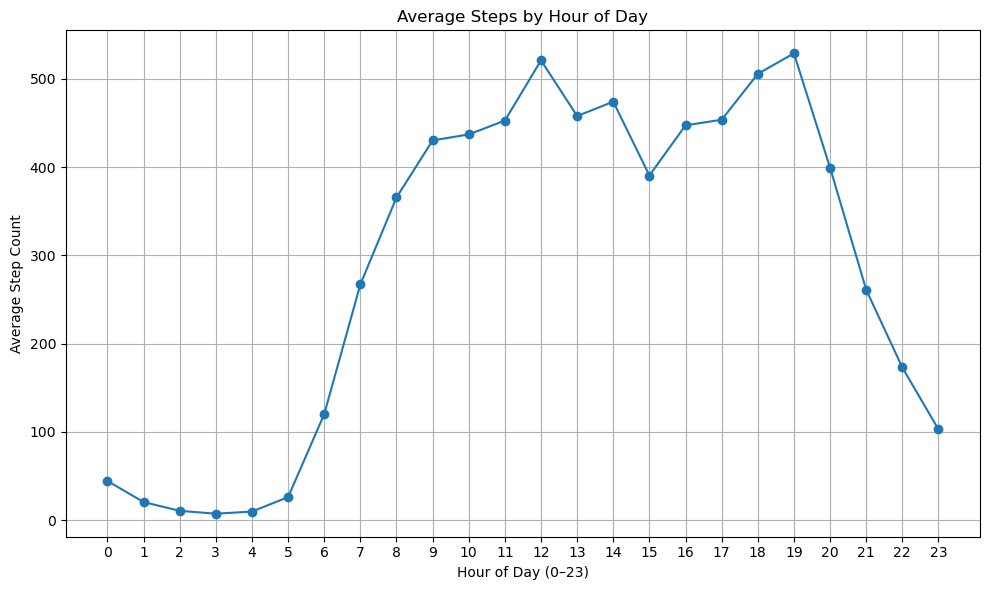

In [29]:
# Plot average steps by hour
plt.figure(figsize=(10, 6))
plt.plot(avg_steps_by_hour['Hour'], avg_steps_by_hour['StepTotal'], marker='o', linestyle='-')
plt.title("Average Steps by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Step Count")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# Group by user and date to calculate total minutes asleep and total time in bed
daily_sleep = sleep_df.groupby(['Id', 'date']).agg({
    'value': 'sum',
    'logId': 'count'  # Using count of rows as total time tracked in minutes
}).reset_index()

daily_sleep.columns = ['Id', 'Date', 'TotalMinutesAsleep', 'TotalTimeInBed']

# Calculate sleep efficiency
daily_sleep['SleepEfficiency'] = daily_sleep['TotalMinutesAsleep'] / daily_sleep['TotalTimeInBed'] 

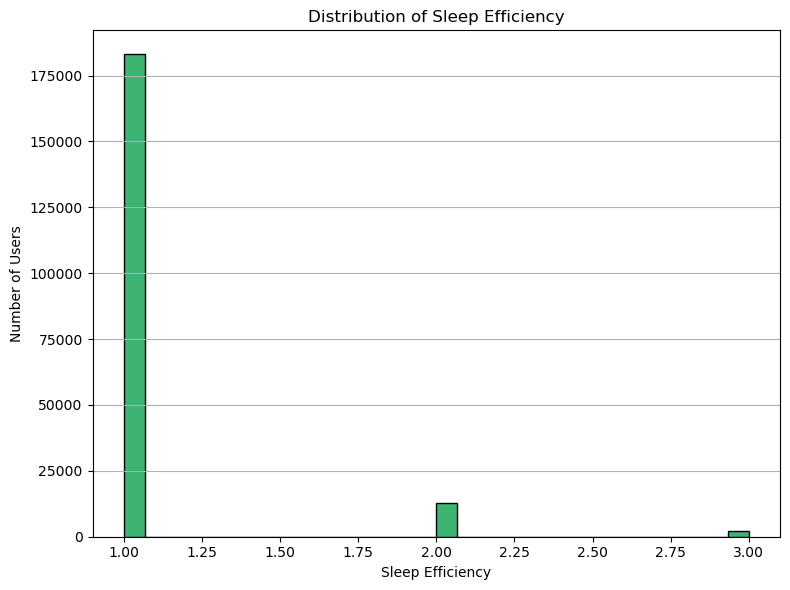

In [31]:
# Plot histogram of sleep efficiency
plt.figure(figsize=(8, 6))
plt.hist(daily_sleep['SleepEfficiency'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title("Distribution of Sleep Efficiency")
plt.xlabel("Sleep Efficiency")
plt.ylabel("Number of Users")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [32]:
# Flag users with low sleep efficiency (e.g., < 0.85)
low_efficiency_users = daily_sleep[daily_sleep['SleepEfficiency'] < 0.85]

daily_sleep.head(), low_efficiency_users.head()

(           Id                Date  TotalMinutesAsleep  TotalTimeInBed  \
 0  1503960366 2016-03-13 02:39:30                   1               1   
 1  1503960366 2016-03-13 02:40:30                   1               1   
 2  1503960366 2016-03-13 02:41:30                   1               1   
 3  1503960366 2016-03-13 02:42:30                   1               1   
 4  1503960366 2016-03-13 02:43:30                   1               1   
 
    SleepEfficiency  
 0              1.0  
 1              1.0  
 2              1.0  
 3              1.0  
 4              1.0  ,
 Empty DataFrame
 Columns: [Id, Date, TotalMinutesAsleep, TotalTimeInBed, SleepEfficiency]
 Index: [])

To clearly share my findings, I created easy-to-understand charts that showed key patterns in user behavior. A scatter plot of total steps and calories burned showed a moderate positive link, meaning that even light to moderate movement can lead to higher energy use. A bar chart comparing average daily minutes at different activity levels showed that users spend most of their time being inactive, with only a small part of the day spent being very active. A pie chart also showed that most users didn’t log their activities themselves, which suggests they prefer automatic tracking. These visuals were made to help Bellabeat’s marketing team understand how users behave and spot new opportunities. I used clear labels, strong contrast, and short notes to make the visuals easy for everyone to read.


From the analysis, I came up with suggestions to help Bellabeat improve its marketing and product positioning.

First, Bellabeat should highlight how easy it is to use its devices. Since most users prefer automatic tracking over entering data themselves, focusing on the convenience of passive tracking can attract more interest.

Second, the data shows that users mostly do light movement and are inactive for much of the day. This suggests Bellabeat can present itself not just as a fitness tracker, but as a full wellness companion. It can appeal to people who want to improve their lifestyle with small changes like reducing stress, moving more, and sleeping better.

Third, Bellabeat should use this information to create friendly and encouraging messages that inspire users to make small but meaningful improvements in their daily routines.

By matching its marketing with what users actually do, Bellabeat can build stronger connections with its audience and stand out in the wellness tech market.

When I looked more closely at how often users were active, I found that most used their Fitbit for 10 to 19 days, but some used it for less than 10 days. This shows that many users stopped using the device regularly, possibly because it wasn’t comfortable or easy to wear all the time.

Bellabeat can respond to this by promoting how comfortable and easy its products are to wear. The marketing can focus on how Bellabeat fits smoothly into daily life and helps users build long-term habits with simple, automatic health tracking that doesn’t feel tiring or hard to keep up with.


When looking at steps taken each hour, I found that most users are more active in the early afternoon and evening, especially around 7 PM. This means users are most engaged between 12 PM and 7 PM.

Bellabeat can use this by sending notifications, reminders to drink water, or mindfulness prompts during these times. Since users are already active then, they’ll be more likely to notice and respond. This helps Bellabeat fit better into their daily routine and makes the smart features more helpful and easier to stick with over time.


When looking at sleep efficiency, I noticed that users had almost 100% efficiency, meaning every minute in bed was counted as sleep. This likely means the way the data was recorded wasn’t very detailed and may not show when users were actually awake or restless.

Bellabeat can stand out by offering more accurate, automatic sleep tracking that shows detailed patterns like wake-ups and restlessness. By combining this with features like mindfulness exercises and wind-down routines, Bellabeat can help users not only sleep longer but also sleep better.